## TODO 
- [ ] check the galaxy counts expected for LSST 
- [x] find the equations for the effect of magnification on the redshift distriution
- [ ] include the redshift information in the model
- [ ] check the galaxy counts expected for DESI
- [ ] check the problem of radius limit in modelling

# Bibio 
- https://arxiv.org/pdf/astro-ph/9912508.pdf
- https://iopscience.iop.org/article/10.1088/0004-637X/772/1/65/pdf
- https://arxiv.org/pdf/astro-ph/9511150.pdf
- https://arxiv.org/pdf/astro-ph/9406052.pdf
- faint end slope https://iopscience.iop.org/article/10.1086/505455/pdf, https://www.aanda.org/articles/aa/pdf/2003/13/aa3018.pdf

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.append('./support')
import clmm
import clmm.modeling as mod
import scipy.integrate as integrate
import mock_data as mock

In [3]:
from astropy.cosmology import FlatLambdaCDM
astropy_cosmology_object = FlatLambdaCDM(H0=70, Om0=0.27, Ob0=0.045)
cosmo_ccl = mod.cclify_astropy_cosmo(astropy_cosmology_object)

In [4]:
density_profile_parametrization = 'nfw'
mass_Delta = 200
cluster_mass = 1e15
cluster_concentration = 4
z_cl = 1
z_source = 2
ngals = 1000

In [5]:
ideal_with_src_dist = mock.generate_galaxy_catalog(
    cluster_mass, z_cl, cluster_concentration, cosmo_ccl, ngals, mass_Delta, 'chang13', zsrc_min=z_cl + 0.2,
    zsrc_max=7.0)

In [6]:
dat = np.loadtxt("profiles_numcosmo.txt")

In [7]:
def plot_profile(r, profile_vals, profile_label='rho', label=None):
    plt.loglog(r, profile_vals, label=label)
    plt.xlabel('r [Mpc]', fontsize='xx-large')
    plt.ylabel(profile_label, fontsize='xx-large')

In [43]:
r3d = np.logspace(-2, 2, 100)
r3d_dat = dat[:,0]

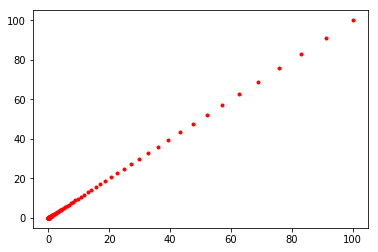

In [45]:
plt.plot(r3d, r3d_dat,'r.')

In [31]:
r3d[0:10]

array([0.01      , 0.01097499, 0.01204504, 0.01321941, 0.01450829,
       0.01592283, 0.01747528, 0.0191791 , 0.02104904, 0.0231013 ])

In [35]:
mod.get_3d_density(r3d[0:10], mdelta=cluster_mass, cdelta=cluster_concentration, 
                       z_cl=z_cl, cosmo=cosmo_ccl)

array([9.33409452e+16, 8.45400757e+16, 7.65258219e+16, 6.92286997e+16,
       6.25854238e+16, 5.65383577e+16, 5.10350114e+16, 4.60275845e+16,
       4.14725487e+16, 3.73302669e+16])

In [36]:
r3d_dat[0:10]

array([0.01      , 0.01097499, 0.01204504, 0.01321941, 0.01450829,
       0.01592283, 0.01747528, 0.0191791 , 0.02104904, 0.0231013 ])

In [37]:
mod.get_3d_density(r3d_dat[0:10], mdelta=cluster_mass, cdelta=cluster_concentration, 
                       z_cl=z_cl, cosmo=cosmo_ccl)

array([ 9.33409452e+16,  0.00000000e+00,  4.01941605e+02,  1.01544031e+05,
        1.16664555e+15,  1.59983600e+13, -2.63589125e+16,  2.85830564e+12,
        8.45400757e+16,  0.00000000e+00])

In [38]:
mod.get_3d_density(r3d_dat[1], mdelta=cluster_mass, cdelta=cluster_concentration, 
                       z_cl=z_cl, cosmo=cosmo_ccl)

array(8.45400757e+16)

In [39]:
mod.get_3d_density(r3d[1], mdelta=cluster_mass, cdelta=cluster_concentration, 
                       z_cl=z_cl, cosmo=cosmo_ccl)

array(8.45400757e+16)

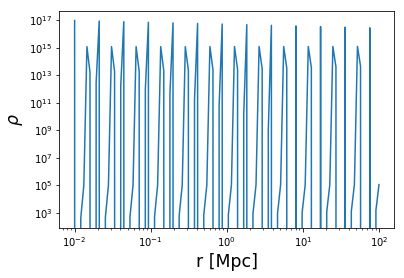

In [10]:
plot_profile(r3d, rho, "$\\rho$")

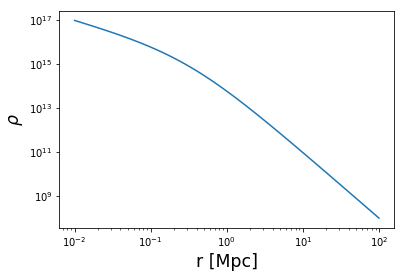

In [18]:
plot_profile(r3d, dat[:,1], "$\\rho$")

In [11]:
Sigma = mod.predict_surface_density(r3d, cluster_mass, cluster_concentration, z_cl, cosmo=cosmo_ccl, 
                                  delta_mdef=mass_Delta, 
                                  halo_profile_model=density_profile_parametrization)

In [ ]:
DeltaSigma = mod.predict_excess_surface_density(r3d, cluster_mass, cluster_concentration, z_cl, cosmo=cosmo_ccl, 
                                              delta_mdef=mass_Delta, 
                                              halo_profile_model=density_profile_parametrization)

In [ ]:
gammat = mod.predict_tangential_shear(r3d, mdelta=cluster_mass, cdelta=cluster_concentration, z_cluster=z_cl, 
                                    z_source=z_source, cosmo=cosmo_ccl, delta_mdef=mass_Delta, 
                                    halo_profile_model=density_profile_parametrization, 
                                    z_src_model='single_plane')

In [ ]:
kappa = mod.predict_convergence(r3d, mdelta=cluster_mass, cdelta=cluster_concentration, 
                               z_cluster=z_cl, z_source=z_source,
                               cosmo=cosmo_ccl, delta_mdef=mass_Delta, 
                               halo_profile_model=density_profile_parametrization, 
                               z_src_model='single_plane')

In [ ]:
gt = mod.predict_reduced_tangential_shear(r3d, mdelta=cluster_mass, cdelta=cluster_concentration, 
                                        z_cluster=z_cl, z_source=z_source, cosmo=cosmo_ccl, 
                                        delta_mdef=mass_Delta, 
                                        halo_profile_model=density_profile_parametrization, 
                                        z_src_model='single_plane')

In [ ]:
mu = mod.predict_magnification(r3d, mdelta=cluster_mass, cdelta=cluster_concentration, 
                                        z_cluster=z_cl, z_source=z_source, cosmo=cosmo_ccl, 
                                        delta_mdef=mass_Delta, 
                                        halo_profile_model=density_profile_parametrization, 
                                        z_src_model='single_plane')

In [20]:
def plot_profile(r, profile_vals, profile_label='rho', label=None):
    plt.loglog(r, profile_vals, label=label)
    plt.xlabel('r [Mpc]', fontsize='xx-large')
    plt.ylabel(profile_label, fontsize='xx-large')

## Magnification definition

#in the WL limit

def mu_wl(kappa): 
    "magnification with WL approximation"
    mu_wl = 1 + 2*kappa
    return mu_wl

In [21]:
#arbitrary Wl/SL limit : when the convergence is k>0.1
WL_limit_radius= r3d[kappa<0.1][0]

magnification = mu(kappa,gammat)
magnification_wl = mu_wl(kappa)

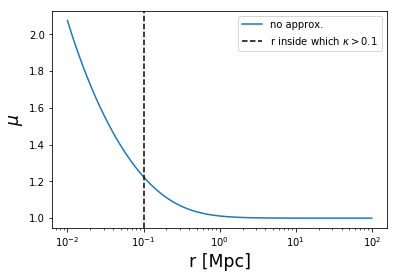

In [23]:
plot_profile(r3d,mu, '$\mu$', "no approx.")
#plot_profile(r3d,magnification_wl, '$\mu$', "WL approx.")
plt.axvline(WL_limit_radius,color='black', linestyle='dashed', label="r inside which $\\kappa>0.1$")
plt.legend()
plt.yscale('linear')

## Magnification bias definition

In [24]:
#magnification bias : number of lensed source over the number of unlensed source
#beta = slope of the power law luminosity function around the limiting flux of the survey, with N ~ AS^(-beta)

def mu_bias(mu,beta):
    mu_bias = mu**(beta-1)
    return mu_bias

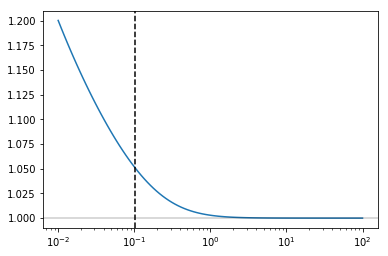

In [26]:
#For early type galaxies

alpha_ET = 0.50
beta_ET = alpha_ET * 2.5

plt.plot(r3d, mu_bias(mu,beta_ET))
#plt.plot(r3d, mu_bias(magnification_wl,beta_ET))
plt.xscale('log')
plt.axhline(1,color='black',alpha=0.2)
plt.axvline(WL_limit_radius,color='black', linestyle='dashed', label="r inside which $\\kappa>0.1$")

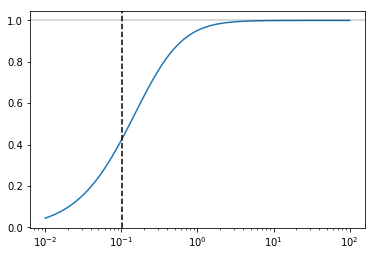

In [27]:
#For late type galaxies

alpha_LT = -1.30
beta_LT = alpha_LT * 2.5

plt.plot(r3d, mu_bias(mu,beta_LT))
#plt.plot(r3d, mu_bias(magnification_wl,beta_LT))
plt.xscale('log')
plt.axhline(1,color='black',alpha=0.2)
plt.axvline(WL_limit_radius,color='black', linestyle='dashed', label="r inside which $\\kappa>0.1$")

## Magnification bias in redshift distribution

### Redshift ditribution

In [28]:
#definition of a redshift distribution following Chang et al. 2013 arXiv:1305.0793

def pzfxn(z, zmin):
    """Redshift distribution function"""
    alpha, beta, z0 = 1.24, 1.01, 0.51
    return (z**alpha)*np.exp(-(z/z0)**beta)

In [43]:
def trunc_pzfxn(z, zmin):
    """Truncated redshift distribution function"""
    return np.heaviside((z>zmin),0)*pzfxn(z)

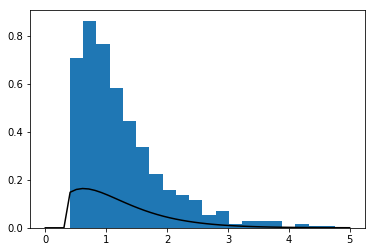

In [51]:
z = np.linspace(0,5)

plt.hist(ideal_with_src_dist['z'],bins=+20, density=True, stacked=True);
plt.plot(z, trunc_pzfxn(z, z_cl+0.2),'k', label ='unlensed')

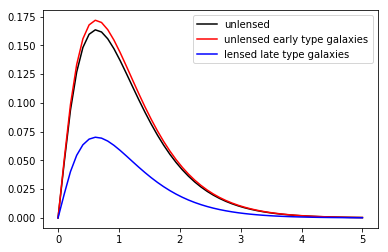

In [52]:
plt.plot(z, pzfxn(z),'k', label ='unlensed')
plt.plot(z, pzfxn(z) * mu_bias(mu[np.argwhere(r3d>0.1)][0],beta_ET),'r', label ='unlensed early type galaxies')
plt.plot(z, pzfxn(z) * mu_bias(mu[np.argwhere(r3d>0.1)][0],beta_LT),'b', label ='lensed late type galaxies')
plt.legend()

### Compute mean of the distribution

In [53]:
#mean redshift of the distribution

def z_mean(func, a, b):
    num = integrate.quad(lambda x: func(x)*x, a, b)
    den = integrate.quad(lambda x: func(x), a, b)
    return num[0]/den[0]

In [59]:
def my_pzfxn(z):
    return trunc_pzfxn(z,z_cl+0.2)

In [60]:
z_mean(my_pzfxn, 0, np.inf)

1.2591820482226692

In [61]:
z_mean(pzfxn, 0.4, np.inf)

1.2591820482832905

In [55]:
np.mean(ideal_with_src_dist['z'])

1.2429495316381656

### Compute the magnification of sources that follow a redshift distribution

In [70]:
#here we make the simplification that their is the same number if sources galaxies in each bin and \
#that they have the same redshift distribution
mu_2d = np.zeros((r3d.size, ngals))

for i in range(r3d.size):
    mu_2d[i,:] = mod.predict_magnification(r3d[i], mdelta=cluster_mass, cdelta=cluster_concentration, 
                                        z_cluster=z_cl, z_source=ideal_with_src_dist['z'], cosmo=cosmo_ccl, 
                                        delta_mdef=mass_Delta, 
                                        halo_profile_model=density_profile_parametrization, 
                                        z_src_model='single_plane')

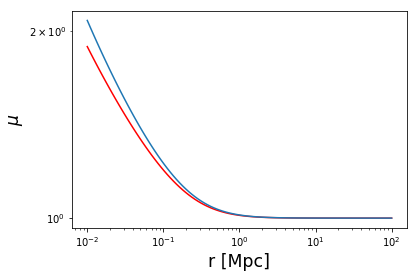

In [71]:
plt.loglog(r3d, np.nanmean(mu_2d,axis=1), 'r')
plot_profile(r3d,mu, '$\mu$', "no approx.")

In [72]:
pzfxn(z) * mu_bias(mu[np.argwhere(r3d>0.1)][0],beta_LT)

array([0.        , 0.02079002, 0.04021943, 0.05440492, 0.06354988,
       0.06848799, 0.07013805, 0.0693386 , 0.06679843, 0.06309079,
       0.0586648 , 0.05386273, 0.04893837, 0.04407415, 0.03939618,
       0.03498697, 0.03089588, 0.02714761, 0.02374891, 0.02069386,
       0.01796796, 0.01555119, 0.01342034, 0.01155072, 0.00991738,
       0.00849594, 0.00726321, 0.00619746, 0.0052787 , 0.0044887 ,
       0.00381104, 0.003231  , 0.00273553, 0.00231308, 0.00195353,
       0.00164799, 0.00138876, 0.00116911, 0.00098326, 0.0008262 ,
       0.00069362, 0.00058184, 0.00048769, 0.00040846, 0.00034186,
       0.00028592, 0.00023898, 0.00019962, 0.00016664, 0.00013903])

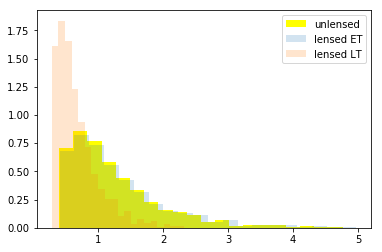

In [92]:
# THIS IS INCORRECT

plt.hist(ideal_with_src_dist['z'],bins=+20, density=True, stacked=True,label='unlensed',color='yellow');
plt.hist(ideal_with_src_dist['z']* mu_bias(np.nanmean(mu_2d,axis=0),beta_ET),bins=+20, density=True, stacked=True,alpha=0.2, label='lensed ET');
plt.hist(ideal_with_src_dist['z']* mu_bias(np.nanmean(mu_2d,axis=0),beta_LT),bins=+20, density=True, stacked=True,alpha=0.2, label='lensed LT');
plt.legend()

In [ ]:
plt.plot(z, pzfxn(z),'k', label ='unlensed')
plt.plot(z, pzfxn(z) * mu_bias(np.nanmean(mu_2d,axis=0),beta_ET),'r', label ='unlensed early type galaxies')
plt.plot(z, pzfxn(z) * mu_bias(np.nanmean(mu_2d,axis=0),beta_LT),'b', label ='lensed late type galaxies')
plt.legend()

ValueError: operands could not be broadcast together with shapes (50,) (1000,) 

In [87]:
z_mean(pzfxn, 0.4, np.inf)

1.2591820482832905

In [88]:
np.mean(ideal_with_src_dist['z'])

1.2429495316381656

In [90]:
np.mean(ideal_with_src_dist['z']* mu_bias(np.nanmean(mu_2d,axis=0),beta_ET))

1.2885939657403365

In [91]:
np.mean(ideal_with_src_dist['z']* mu_bias(np.nanmean(mu_2d,axis=0),beta_LT))

0.6755731100724828

### TESTS

In [44]:
def beta_z(z, beta_0,beta_1):
    beta = beta_0 + beta_1 * (1+z)
    return beta


In [45]:
def mu_bias(z, mu, beta_0, beta_1):
    mu_bias = mu**(beta_z(z,beta_0, beta_1) -1)
    return mu_bias

In [46]:
beta_0, beta_1 = 0.9, 0.1
mu_bias(z, magnification[np.argwhere(r3d>0.1)][0], beta_0, beta_1)

array([1.        , 1.00203386, 1.00407185, 1.00611399, 1.00816029,
       1.01021074, 1.01226537, 1.01432417, 1.01638716, 1.01845435,
       1.02052574, 1.02260135, 1.02468117, 1.02676523, 1.02885352,
       1.03094606, 1.03304286, 1.03514392, 1.03724926, 1.03935888,
       1.04147279, 1.043591  , 1.04571351, 1.04784034, 1.0499715 ,
       1.052107  , 1.05424683, 1.05639102, 1.05853957, 1.06069249,
       1.06284979, 1.06501147, 1.06717756, 1.06934804, 1.07152295,
       1.07370227, 1.07588603, 1.07807423, 1.08026688, 1.08246399,
       1.08466557, 1.08687162, 1.08908216, 1.0912972 , 1.09351675,
       1.09574081, 1.09796939, 1.1002025 , 1.10244016, 1.10468236])

In [49]:
def fct(z):
    return pzfxn(z)*mu_bias(z, magnification[np.argwhere(r3d>0.1)][0], beta_0, beta_1)

In [50]:
z_mean(fct, 0, np.inf)

1.1310539254100362